# WeatherPy
----

Key Observable Trends
1.  The maximum temperature is warmest between latitudes of zero and 20, which is near the equator.  The maximum temperature gradually declines as you move away from the equator.
2.  The humidity is higher as you move closer to the equator also.
3.  Cloudiness varies widely per city, and is not correlated with latitude.
4.  Most cities have an average wind speed of between 0 and 15 miles per hour, and is not correlated with latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
# Create dataframe of random cities
cities_dict = {
    "city": cities
}
cities_data = pd.DataFrame(cities_dict)
cities_data['Record_ID'] = cities_data.index
#print(cities_data)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# set up lists to hold reponse info
lat = []
temp_max = []
humidity = []
wind = []
clouds = []


# Loop through the list of cities and perform a request for data on each
# Tutor recommended that I print not found for the exceptions.
print("Beginning Data Retrieval")
print("----------------------------- ")
for index, row in cities_data.iterrows():
    city = row["city"]
    try:
        #print(f"Processing record xx | {Record_ID}")
        print(f"Processing record xx | {city}")
        print(query_url + city)
        response = requests.get(query_url + city).json()
        cities_data.loc[index, "latitude"] = response['coord']['lat']
        cities_data.loc[index, "temp_max"] = response['main']['temp_max']
        cities_data.loc[index, "humidity"] = response['main']['humidity']
        cities_data.loc[index, "wind"] = response['wind']['speed']
        cities_data.loc[index, "clouds"] = response['clouds']['all']
    except:
        print(f"{city} not found")
print("----------------------------- ")
print("Ending Data Retrieval")
print("----------------------------- ")

Beginning Data Retrieval
----------------------------- 
Processing record xx | bluff
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=bluff
Processing record xx | nador
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=nador
Processing record xx | busselton
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=busselton
Processing record xx | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=luderitz
Processing record xx | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=punta arenas
Processing record xx | tema
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tema
Processing record xx | amderma
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa

Processing record xx | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=katsuura
Processing record xx | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=butaritari
Processing record xx | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=coihaique
Processing record xx | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=carnarvon
Processing record xx | umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=umzimvubu
umzimvubu not found
Processing record xx | richards bay
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=richards bay
Processing record xx | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83

Processing record xx | mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mount gambier
Processing record xx | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mar del plata
Processing record xx | rorvik
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=rorvik
Processing record xx | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=yar-sale
Processing record xx | baykit
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=baykit
Processing record xx | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=saskylakh
Processing record xx | karauzyak
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&uni

Processing record xx | varzea da palma
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=varzea da palma
Processing record xx | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=longyearbyen
Processing record xx | at-bashi
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=at-bashi
Processing record xx | van buren
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=van buren
Processing record xx | mathbaria
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mathbaria
Processing record xx | pevek
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=pevek
Processing record xx | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&un

Processing record xx | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=carutapera
Processing record xx | padang
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=padang
Processing record xx | aksay
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=aksay
Processing record xx | brae
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=brae
Processing record xx | gotsu
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=gotsu
Processing record xx | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=palabuhanratu
palabuhanratu not found
Processing record xx | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&unit

Processing record xx | tutoia
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tutoia
Processing record xx | pueblo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=pueblo
Processing record xx | lanzhou
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=lanzhou
Processing record xx | saurimo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=saurimo
Processing record xx | santa helena
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=santa helena
Processing record xx | serebriya
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=serebriya
Processing record xx | odweyne
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=odwe

Processing record xx | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=okhotsk
Processing record xx | fasa
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=fasa
Processing record xx | port pirie
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=port pirie
Processing record xx | flinders
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=flinders
Processing record xx | jiexiu
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=jiexiu
Processing record xx | sovetskiy
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=sovetskiy
Processing record xx | ishigaki
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=ishigaki


Processing record xx | kirakira
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=kirakira
Processing record xx | baherden
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=baherden
Processing record xx | necochea
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=necochea
Processing record xx | juli
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=juli
Processing record xx | yaan
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=yaan
Processing record xx | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=grand river south east
grand river south east not found
Processing record xx | talnakh
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa6

Processing record xx | piterka
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=piterka
Processing record xx | bolshegrivskoye
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=bolshegrivskoye
bolshegrivskoye not found
Processing record xx | haibowan
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=haibowan
haibowan not found
Processing record xx | nizhneivkino
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=nizhneivkino
Processing record xx | taseyevo
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=taseyevo
Processing record xx | bagotville
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=bagotville
Processing record xx | novoagansk
http://api.openweathermap.org/dat

Processing record xx | tunduru
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=tunduru
tunduru not found
Processing record xx | mikkeli
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mikkeli
Processing record xx | bonthe
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=bonthe
Processing record xx | douentza
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=douentza
Processing record xx | miraflores
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=miraflores
Processing record xx | marcona
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=marcona
marcona not found
Processing record xx | sharjah
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f37817

Processing record xx | jacareacanga
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=jacareacanga
Processing record xx | sur
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=sur
Processing record xx | embrach
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=embrach
Processing record xx | banikoara
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=banikoara
Processing record xx | stokmarknes
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=stokmarknes
Processing record xx | mucuri
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=mucuri
Processing record xx | macae
http://api.openweathermap.org/data/2.5/weather?appid=86c3aa682c83f192f378174a13db972b&units=imperial&q=maca

In [6]:
# Export the city data into a .csv file.
cities_data.to_csv(r"output_data/cities.csv")
cities_data.head()

,city,Record_ID,latitude,temp_max,humidity,wind,clouds
0,bluff,0,-23.58,75.00,41.0,1.57,14.0
1,nador,1,35.17,71.60,88.0,6.93,0.0
2,busselton,2,-33.64,60.01,85.0,23.60,0.0
3,luderitz,3,-26.65,51.80,66.0,12.75,0.0
4,punta arenas,4,-53.16,37.40,86.0,6.93,40.0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
import datetime

now = datetime.datetime.now()

#print "Current date and time using str method of datetime object:"
current_mthday = (("%d" % now.month) + "-" + ("%d" % now.day))
current_year = (now.strftime("%y"))

current_date = current_mthday + "-" + current_year

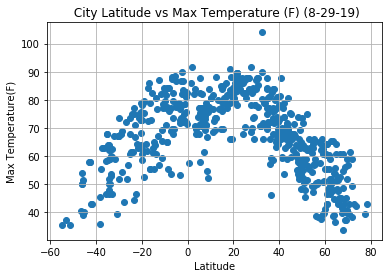

In [8]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["temp_max"], marker="o")

# Incorporate the other graph properties
plt.title(f" City Latitude vs Max Temperature (F) ({current_date})")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

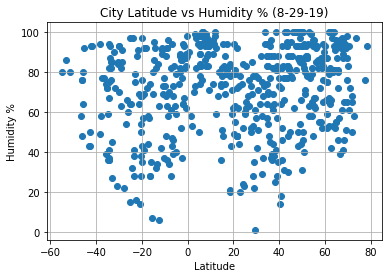

In [9]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity % ({current_date})")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

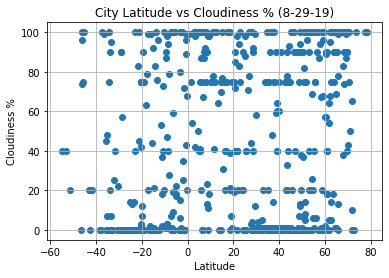

In [10]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["clouds"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness % ({current_date})")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

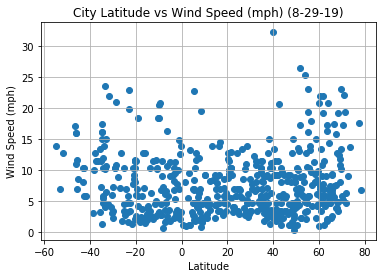

In [11]:
# Build a scatter plot for each data type
plt.scatter(cities_data["latitude"], cities_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed (mph) ({current_date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindInWorldCities.png")

# Show plot
plt.show()